In [1]:
################################ Set up #########################################
from __future__ import division, print_function, unicode_literals
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

############################# Import the data ##########################################
import pandas as pd
file = r'C:\Users\sguo0\Downloads\Bank Data.xlsx'
df = pd.read_excel(file)
print(df.head())
print(df.shape)
df.info()

# convert the target variable
df['y'] = df.y.map({'yes':1, 'no':0})

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

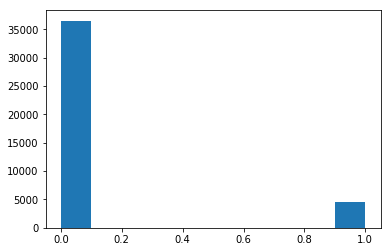

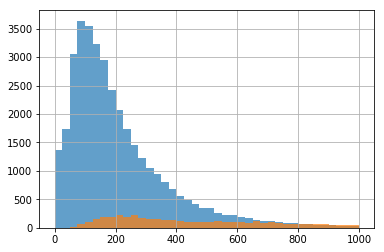

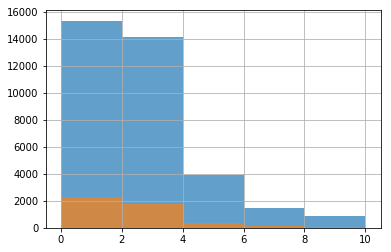

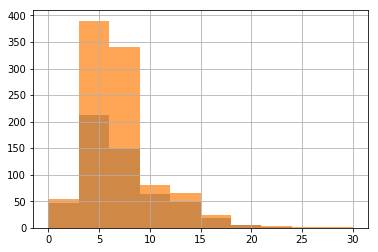

In [2]:
plt.hist(df.y)
plt.show()

df.groupby('y').duration.hist(alpha=0.7, bins=40, range=(0,1000))  # contact duration distribution
plt.show()

df.groupby('y').campaign.hist(alpha=0.7, bins=5, range=(0,10))  # number of contacts distribution
plt.show()

df.groupby('y').pdays.hist(alpha=0.7, range=(0,30))  # days since last contacted distribution
plt.show()


In [3]:
# covert pdays into 4 categorical values
# last contacted from a previous campaign: <5 days, <10 days, >10 days, or never
bins = [-np.inf, 4, 9, 28, np.inf]
names = ['<5', '5to9', '>10', 'never']

df['pdays'] = pd.cut(df['pdays'], bins, labels=names)

In [4]:
# convert values "unknown" to NaN
df.loc[df['job'] == 'unknown','job'] = np.nan
df.loc[df['marital'] == 'unknown','marital'] = np.nan
df.loc[df['education'] == 'unknown','education'] = np.nan
df.loc[df['default'] == 'unknown','default'] = np.nan
df.loc[df['housing'] == 'unknown','housing'] = np.nan
df.loc[df['loan'] == 'unknown','loan'] = np.nan

# export the csv file with no dummies
#df.to_csv(r'C:\Users\sguo0\Downloads\data_wo_dummies.csv', index=False)

In [5]:
# create dummmies for categorical variables

# NaNs are dropped and indicated by all 0s in other levels
df_dummy = pd.get_dummies(df, columns=['job','marital','education','default','housing','loan'])

# First level is dropped and indicated by all 0s in other levels
df_dummy = pd.get_dummies(df_dummy, columns=['contact','month','day_of_week','pdays','poutcome'], drop_first=True)

# export the csv file with dummies
#df_dummy.to_csv(r'C:\Users\sguo0\Downloads\data_w_dummies.csv', index=False)